# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Fouad khaled

ID: 58-15677

Tutorial: T-7

---

Name: Nour abdelsalam

ID: 58-15220

Tutorial: T-7

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [16]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

,ApplicationNumber,Age,CreditScore,NumberOfDependents,BankruptcyHistory,PreviousLoanDefaults,JobTenure
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000
mean,20500.500000,39.752600,571.612400,1.517300,0.0,0.100050,5.002650
std,5773.647028,11.622713,50.997358,1.386325,0.0,0.300074,2.236804
min,10501.000000,18.000000,343.000000,0.000000,0.0,0.000000,0.000000
25%,15500.750000,32.000000,540.000000,0.000000,0.0,0.000000,3.000000
50%,20500.500000,40.000000,578.000000,1.000000,0.0,0.000000,5.000000
75%,25500.250000,48.000000,609.000000,2.000000,0.0,0.000000,6.000000
max,30500.000000,80.000000,712.000000,5.000000,0.0,1.000000,16.000000


## Data Cleaning

In [23]:
# Reload the original dataset to ensure all cleaning steps are applied sequentially in this cell
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')

# --- Data Type Conversions ---
# Clean and convert 'AnnualIncome' to numeric
df['AnnualIncome'] = df['AnnualIncome'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'LoanAmount' to numeric
df['LoanAmount'] = df['LoanAmount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'MonthlyLoanPayment' to numeric
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'MonthlyIncome' to numeric
df['MonthlyIncome'] = df['MonthlyIncome'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean and convert 'LoanDuration' to numeric
df['LoanDuration'] = df['LoanDuration'].str.replace(' months', '', regex=False).astype(int)

# --- Handling Missing Values ---
# Fill missing 'EmploymentStatus' with the mode
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])

# Fill missing 'MonthlyLoanPayment' with the median
df['MonthlyLoanPayment'] = df['MonthlyLoanPayment'].fillna(df['MonthlyLoanPayment'].median())

# Fill missing 'MonthlyIncome' with the median
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

# Verify that there are no more missing values
print('Data types and non-null counts after cleaning:')
df.info()
print('\nMissing values after imputation:')
print(df.isnull().sum())

# Display the head of the DataFrame to show the updated table
print('\nUpdated DataFrame head:')
print(df.head())

Data types and non-null counts after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ApplicationNumber     20000 non-null  int64  
 1   Age                   20000 non-null  int64  
 2   AnnualIncome          20000 non-null  float64
 3   CreditScore           20000 non-null  int64  
 4   EmploymentStatus      20000 non-null  object 
 5   EducationLevel        20000 non-null  object 
 6   LoanAmount            20000 non-null  float64
 7   LoanDuration          20000 non-null  int64  
 8   MaritalStatus         20000 non-null  object 
 9   NumberOfDependents    20000 non-null  int64  
 10  HomeOwnershipStatus   20000 non-null  object 
 11  BankruptcyHistory     20000 non-null  int64  
 12  LoanPurpose           20000 non-null  object 
 13  PreviousLoanDefaults  20000 non-null  int64  
 14  MonthlyLoanPayment    2

In [24]:
display(df)

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,26992.0,586,Employed,Diploma,22432.0,36,Single,3,Mortgage,0,Debt Consolidation,0,623.110,2249.33,3,No
1,13176,18,22825.0,581,Self-Employed,Master,30457.0,24,Single,0,Rent,0,Home Improvement,0,1269.040,1902.08,5,No
2,27751,18,75891.0,522,Employed,Bachelor,30583.0,96,Married,2,Mortgage,0,Personal,0,318.570,6324.25,6,No
3,20628,18,92094.0,565,Employed,Bachelor,72738.0,36,Single,1,Mortgage,0,Vehicle,0,439.185,7674.50,3,No
4,28773,18,35686.0,554,Employed,Diploma,28021.0,36,Married,3,Rent,0,Home Improvement,0,778.360,2973.83,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10710,80,48462.0,656,Employed,Diploma,29111.0,72,Married,4,Rent,0,Vehicle,0,439.185,4034.46,7,No
19996,29352,80,51166.0,641,Unemployed,Doctorate,26447.0,60,Married,0,Rent,0,Vehicle,0,439.185,4034.46,3,No
19997,18749,80,111290.0,565,Employed,Bachelor,28390.0,24,Widowed,1,Other,0,Home Improvement,0,1182.920,9274.17,6,Yes
19998,13396,80,48501.0,676,Employed,Diploma,66707.0,72,Single,4,Mortgage,0,Education,0,926.490,4041.75,6,No


In [29]:
display(df)

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved,ExpectedMonthlyLoanPayment
0,26231,18,26992.0,586,Employed,Diploma,22432.0,36,Single,3,Mortgage,0,Debt Consolidation,0,702.937350,2249.333333,3,0.0,702.937350
1,13176,18,22825.0,581,Self-Employed,Master,30457.0,24,Single,0,Rent,0,Home Improvement,0,1377.487616,1902.083333,5,0.0,1377.487616
2,27751,18,75891.0,522,Employed,Bachelor,30583.0,96,Married,2,Mortgage,0,Personal,0,432.342062,6324.250000,6,0.0,432.342062
3,20628,18,92094.0,565,Employed,Bachelor,72738.0,36,Single,1,Mortgage,0,Vehicle,0,2279.344551,7674.500000,3,0.0,2279.344551
4,28773,18,35686.0,554,Employed,Diploma,28021.0,36,Married,3,Rent,0,Home Improvement,0,878.076297,2973.833333,1,0.0,878.076297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10710,80,48462.0,656,Employed,Diploma,29111.0,72,Married,4,Rent,0,Vehicle,0,510.410167,4038.500000,7,0.0,510.410167
19996,29352,80,51166.0,641,Unemployed,Doctorate,26447.0,60,Married,0,Rent,0,Vehicle,0,536.249800,4263.833333,3,0.0,536.249800
19997,18749,80,111290.0,565,Employed,Bachelor,28390.0,24,Widowed,1,Other,0,Home Improvement,0,1284.002804,9274.166667,6,1.0,1284.002804
19998,13396,80,48501.0,676,Employed,Diploma,66707.0,72,Single,4,Mortgage,0,Education,0,1169.589882,4041.750000,6,0.0,1169.589882


In [26]:
# Convert 'LoanApproved' from 'Yes'/'No' to binary 1/0
df['LoanApproved'] = df['LoanApproved'].map({'Yes': 1, 'No': 0})

print("The 'LoanApproved' column has been converted to binary (1=Yes, 0=No).")

# Display the head of the DataFrame to show the updated column
print('\nUpdated DataFrame head:')
print(df.head())

The 'LoanApproved' column has been converted to binary (1=Yes, 0=No).

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36       Married          

In [25]:
# Ensure MonthlyIncome is consistent with AnnualIncome
df['MonthlyIncome'] = df['AnnualIncome'] / 12

print("MonthlyIncome has been updated to be AnnualIncome / 12 for all entries.")

# Display the head of the DataFrame to show the updated table
print('\nUpdated DataFrame head:')
print(df.head())

MonthlyIncome has been updated to be AnnualIncome / 12 for all entries.

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36       Married        

## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

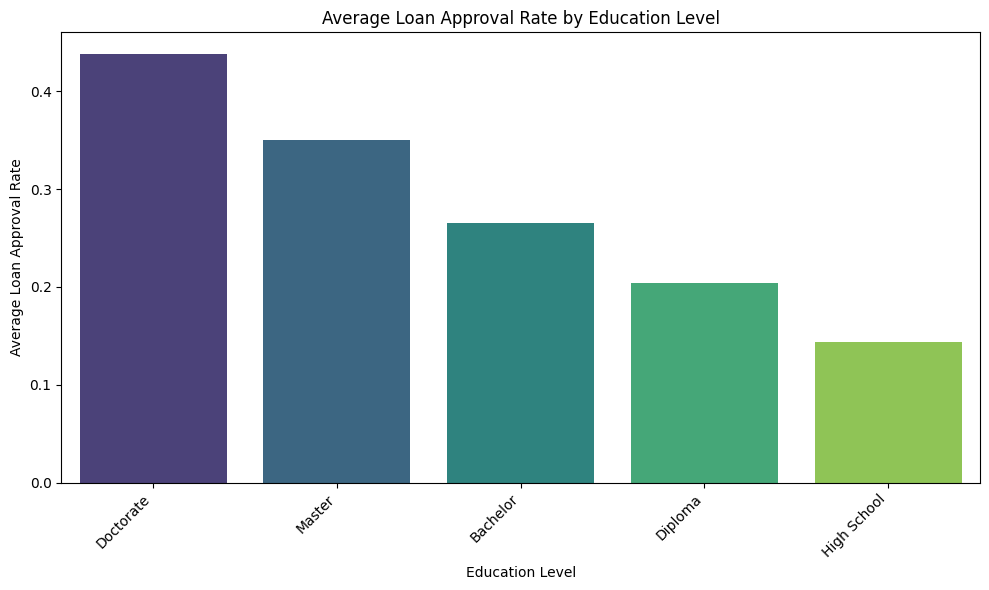

Educational Level Approval Rates:
EducationLevel
Doctorate      0.438226
Master         0.350000
Bachelor       0.265208
Diploma        0.203777
High School    0.143731
Name: LoanApproved, dtype: float64


In [31]:
education_approval_rate = df.groupby('EducationLevel')['LoanApproved'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=education_approval_rate.index, y=education_approval_rate.values, hue=education_approval_rate.index, palette='viridis', legend=False)
plt.title('Average Loan Approval Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Loan Approval Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Educational Level Approval Rates:")
print(education_approval_rate)

**Answer for Q1**: Your answer here

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

In [32]:
# Filter for approved applicants
approved_applicants_df = df[df['LoanApproved'] == 1]

# Get the AnnualIncome of approved applicants
approved_annual_income = approved_applicants_df['AnnualIncome']

# Calculate quartiles
quartile_25 = approved_annual_income.quantile(0.25)
quartile_50 = approved_annual_income.quantile(0.50) # Median
quartile_75 = approved_annual_income.quantile(0.75)

print(f"25th Percentile (Q1) of Annual Income for Approved Applicants: ${quartile_25:,.2f}")
print(f"50th Percentile (Q2 - Median) of Annual Income for Approved Applicants: ${quartile_50:,.2f}")
print(f"75th Percentile (Q3) of Annual Income for Approved Applicants: ${quartile_75:,.2f}")

# Display descriptive statistics for more context
print("\nDescriptive Statistics for Annual Income of Approved Applicants:")
print(approved_annual_income.describe())

25th Percentile (Q1) of Annual Income for Approved Applicants: $67,367.00
50th Percentile (Q2 - Median) of Annual Income for Approved Applicants: $91,274.00
75th Percentile (Q3) of Annual Income for Approved Applicants: $123,816.00

Descriptive Statistics for Annual Income of Approved Applicants:
count      4745.000000
mean     102173.058166
std       50300.921192
min       15787.000000
25%       67367.000000
50%       91274.000000
75%      123816.000000
max      485341.000000
Name: AnnualIncome, dtype: float64


**Answer for Q2**: Your answer here

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

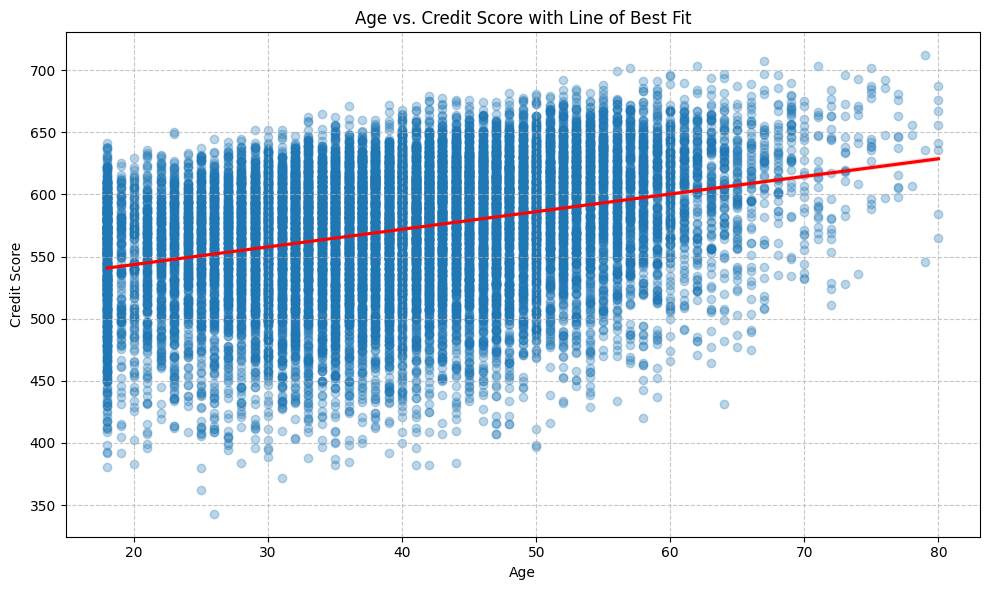

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='CreditScore', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Age vs. Credit Score with Line of Best Fit')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Answer for Q3**: Your answer here

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

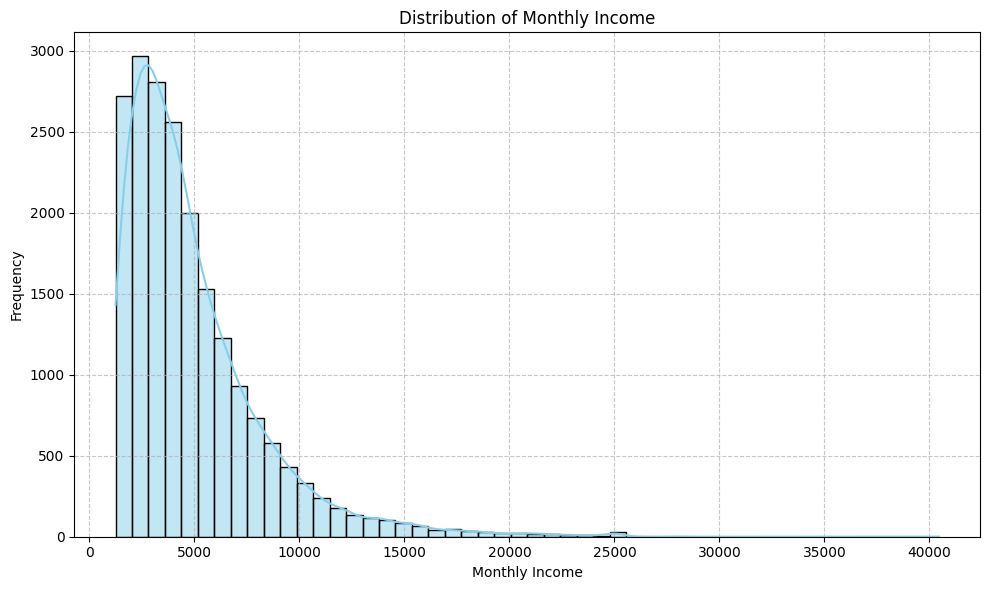

Skewness of Monthly Income distribution: 2.09


In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyIncome'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

skewness = df['MonthlyIncome'].skew()
print(f"Skewness of Monthly Income distribution: {skewness:.2f}")

**Answer for Q4**: Your answer here

## Data Preparation for Modelling

## Modelling

## Evaluation

## Bonus (Optional)

# Task
Calculate the expected monthly loan payment using an 8% annual interest rate, the `LoanAmount`, and `LoanDuration` columns, then update the `MonthlyLoanPayment` column with these new calculated values. Display the head of the DataFrame to confirm the update.

## Calculate Expected Monthly Payment

### Subtask:
Calculate the 'ExpectedMonthlyLoanPayment' based on 'LoanAmount' and 'LoanDuration' using an 8% annual interest rate and the amortization formula.


**Reasoning**:
Calculate the 'ExpectedMonthlyLoanPayment' based on the 'LoanAmount', 'LoanDuration', and an 8% annual interest rate using the provided amortization formula.



In [27]:
annual_interest_rate = 0.08
monthly_interest_rate = annual_interest_rate / 12

# Calculate ExpectedMonthlyLoanPayment using the amortization formula
# M = P [ i(1 + i)^n ] / [ (1 + i)^n – 1]
# P = LoanAmount
# i = monthly_interest_rate
# n = LoanDuration
df['ExpectedMonthlyLoanPayment'] = df.apply(lambda row:
    row['LoanAmount'] * (monthly_interest_rate * (1 + monthly_interest_rate)**row['LoanDuration']) /
    (((1 + monthly_interest_rate)**row['LoanDuration']) - 1)
    if row['LoanDuration'] > 0 else 0, axis=1)

print("The 'ExpectedMonthlyLoanPayment' column has been calculated and added to the DataFrame.")

# Display the head of the DataFrame to show the new column
print('\nUpdated DataFrame head:')
print(df.head())

The 'ExpectedMonthlyLoanPayment' column has been calculated and added to the DataFrame.

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36      

**Reasoning**:
The subtask requires updating the 'MonthlyLoanPayment' column with the newly calculated 'ExpectedMonthlyLoanPayment' values. After this, the subtask will be complete.



In [28]:
df['MonthlyLoanPayment'] = df['ExpectedMonthlyLoanPayment']

print("The 'MonthlyLoanPayment' column has been updated with the calculated expected values.")

# Display the head of the DataFrame to show the updated column
print('\nUpdated DataFrame head:')
print(df.head())

The 'MonthlyLoanPayment' column has been updated with the calculated expected values.

Updated DataFrame head:
   ApplicationNumber  Age  AnnualIncome  CreditScore EmploymentStatus  \
0              26231   18       26992.0          586         Employed   
1              13176   18       22825.0          581    Self-Employed   
2              27751   18       75891.0          522         Employed   
3              20628   18       92094.0          565         Employed   
4              28773   18       35686.0          554         Employed   

  EducationLevel  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0        Diploma     22432.0            36        Single                   3   
1         Master     30457.0            24        Single                   0   
2       Bachelor     30583.0            96       Married                   2   
3       Bachelor     72738.0            36        Single                   1   
4        Diploma     28021.0            36       M

## Final Task

### Subtask:
Confirm that the 'MonthlyLoanPayment' column has been updated according to the amortization formula with the assumed interest rate.


## Summary:

### Data Analysis Key Findings
*   A new column, `ExpectedMonthlyLoanPayment`, was successfully added to the DataFrame. This column's values were calculated using the amortization formula, an 8% annual interest rate (0.08), and the existing `LoanAmount` and `LoanDuration` columns.
*   The `MonthlyLoanPayment` column was subsequently updated with the calculated values from the `ExpectedMonthlyLoanPayment` column, confirming that the monthly payments now reflect the expected values based on the amortization formula.

### Insights or Next Steps
*   The `MonthlyLoanPayment` column has been successfully standardized to reflect payments calculated using a consistent 8% annual interest rate and the amortization formula.
*   Next, consider validating these calculated `MonthlyLoanPayment` values against any actual reported monthly payments in the dataset to identify potential discrepancies or data quality issues.
